<a href="https://colab.research.google.com/github/saadkamal219/Artificial_Intilligence/blob/main/Scaling_%26_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#Scaling is Efficient for kmeans, KNN, PCA, Gradient descent etc
# Popular techniques: Standardization, normalization

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [45]:
filepath = '/content/drive/MyDrive/Machine Learning Dataset/Social_Network_Ads.csv'

dataframe = pd.read_csv(filepath)

dataframe.sample(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
53,15671655,Female,35,23000,0
117,15591433,Male,36,52000,0
223,15593715,Male,60,102000,1
264,15600379,Male,48,90000,1
323,15619465,Female,48,30000,1
109,15697997,Female,38,80000,0
12,15746139,Male,20,86000,0
224,15575002,Female,35,60000,0
6,15598044,Female,27,84000,0
49,15793813,Female,31,89000,0


In [46]:
dataframe.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [47]:
dataframe_modified_v1 = dataframe.iloc[:, 2:] #fist is all row, second is from second col to last col, if we need to modifiy the limit, change the value in the last
dataframe_modified_v1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [48]:
dataframe_modified_v1.shape

(400, 3)

In [49]:
x = dataframe_modified_v1.drop('Purchased', axis = 1) #column
y = dataframe_modified_v1['Purchased']

#alternative way

x1 = dataframe_modified_v1.iloc[:, 0:2]
y1 = dataframe_modified_v1.iloc[:, 2:]

In [50]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [51]:
x1

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

In [53]:
y_train

93     0
23     1
299    1
13     0
90     0
      ..
255    1
72     0
396    1
235    1
37     0
Name: Purchased, Length: 320, dtype: int64

#**Standard Scalling**

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_test_scaled

In [ ]:
np.round(x_train_scaled)
np.round(x_train_scaled)

In [57]:
#creating dataframe for scaled columns

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns = x_test.columns)

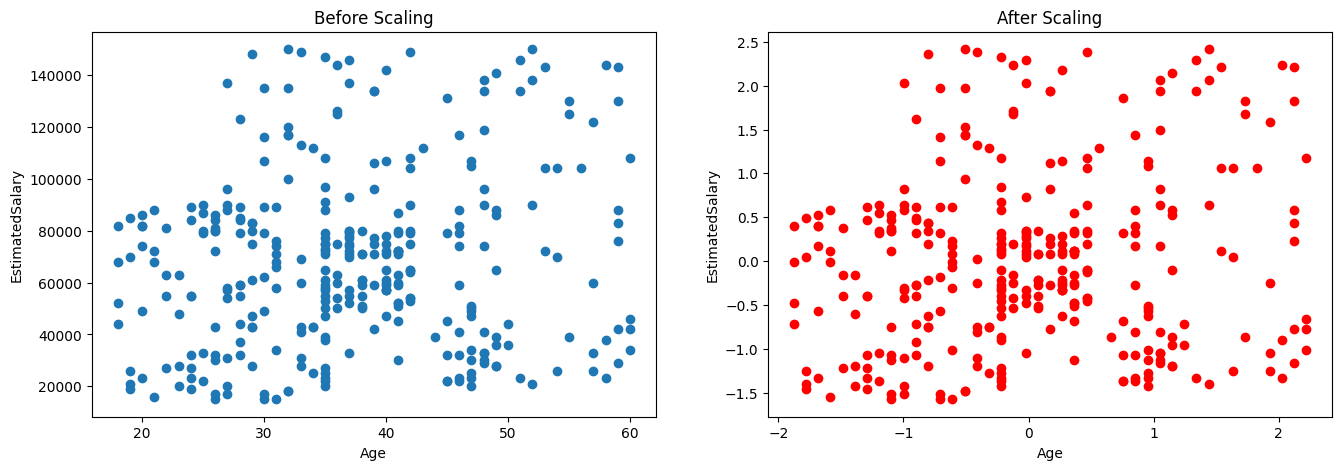

In [58]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(x_train['Age'], x_train['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(x_train_scaled_df['Age'], x_train_scaled_df['EstimatedSalary'],color='red')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('After Scaling')

plt.show()

In [68]:
#without scaling
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

LR_obj = LogisticRegression()

LR_obj.fit(x_train, y_train)

y_pred = LR_obj.predict(x_test)

print("Accuracy score without scaling:", (accuracy_score(y_test, y_pred)) * 100,"%")

Accuracy score without scaling: 60.0 %


In [60]:
LR_Scaled_obj = LogisticRegression()

LR_Scaled_obj.fit(x_train_scaled, y_train)

y_scaled_pred = LR_Scaled_obj.predict(x_test_scaled)

print("Accuracy score without scaling:", (accuracy_score(y_test, y_pred)) * 100,"%")
print("Accuracy score with scaling:   ", (accuracy_score(y_test, y_scaled_pred)) * 100,"%")

Accuracy score without scaling: 60.0 %
Accuracy score with scaling:    83.75 %


#**Min Max Normalization**

In [61]:
# x' = (x - min)/(max - min)

In [84]:
from sklearn.preprocessing import MinMaxScaler

# alternative

# min_max_scaler = MinMaxScaler(feature_range=(0,1)) #range of the values that will scaled

# # fit the scaler to the train set, it will learn the parameters
# min_max_scaler.fit(x_train)

# # transform train and test sets
# X_train_scaled1 = min_max_scaler.transform(x_train)
# X_test_scaled1 = min_max_scaler.transform(x_test)

min_max_scaler = MinMaxScaler(feature_range=(0,10))

x_train_scaled_min_max = min_max_scaler.fit_transform(x_train)
x_test_scaled_min_max = min_max_scaler.transform(x_test)

In [ ]:
x_train_scaled_min_max

In [ ]:
np.round(x_train_scaled_min_max)
np.round(x_test_scaled_min_max)

In [87]:
x_train_scaled_min_max_df = pd.DataFrame(x_train_scaled_min_max, columns=x_train.columns)
x_test_scaled_min_max_df = pd.DataFrame(x_test_scaled_min_max, columns=x_test.columns)

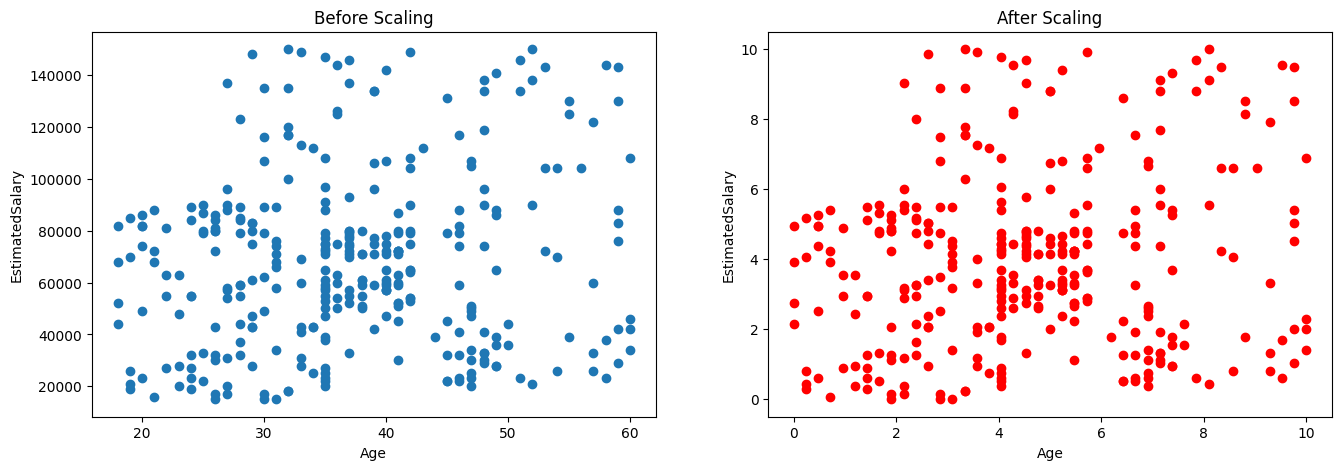

In [88]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(x_train['Age'], x_train['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(x_train_scaled_min_max_df['Age'], x_train_scaled_min_max_df['EstimatedSalary'],color='red') #you need a dataframe here not a an array
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('After Scaling')


plt.show()

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

LR_obj_min_max = LogisticRegression()

LR_obj_min_max.fit(x_train_scaled_min_max, y_train)

y_pred_min_max = LR_obj_min_max.predict(x_test_scaled_min_max)

print("Accuracy score without scaling:              ", (accuracy_score(y_test, y_pred)) * 100,"%")
print("Accuracy score with scaling:                 ", (accuracy_score(y_test, y_scaled_pred)) * 100,"%")
print("Accuracy score with Min Max Normalization:   ", (accuracy_score(y_test, y_pred_min_max)) * 100,"%")

Accuracy score without scaling:               60.0 %
Accuracy score with scaling:                  83.75 %
Accuracy score with Min Max Normalization:    82.5 %
